# <font color='red'>Some maths</font>

## <font color='cyan'>Loss function at a point</font>
$L = \dfrac{1}{2}(\hat{y}_i - y_i)^2$

## <font color='cyan'>Loss function at all points</font>
$J = \dfrac{1}{N}\cdot\dfrac{1}{2}\displaystyle\sum_{i = 1}^N(\hat{y}_i - y_i)^2$

## <font color='cyan'>Prediction $\hat{y}_i$ value</font>
$\hat{y}_i = w_0 + w_1x_i$

# <font color='red'>Functions</font>

In [109]:
def linear_function(x, w):
  return w[0] + w[1] * x

# <font color='red'>Global variables</font>

In [110]:
# number of data records used to train
NO_VALUES = 11
# learning rate in gradient descent
LEARNING_RATE = 0.001
# number of learning iterations
EPOCHS = 1000
# interval at which training progress is printed
VERBOSE = EPOCHS / 10

# <font color='red'>Preprocessing</font>

## <font color='cyan'>Drop NaNs</font>

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# read data from the imported csv file and drop NaN values
data = pd.read_csv("./traffic_data.csv").dropna().values

# only get a subset data in the dataset
data = data[:NO_VALUES]

x = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)

## <font color='cyan'>Standardize x (Feature Scaling)</font>

In [112]:
x_mean = np.mean(x, axis=0)
x_std = np.std(x, axis=0)
x = (x - x_mean) / x_std

# <font color='red'>Data graph</font>

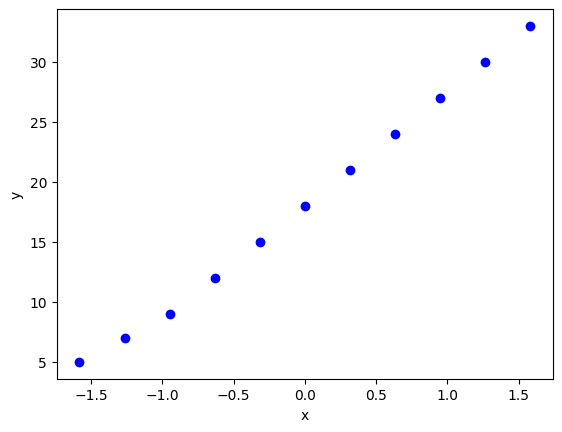

In [113]:
plt.plot(x, y, 'bo')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# <font color='red'>Train</font>

In [114]:
# get number of records in dataset
N = data.shape[0]

# add a column of ones on the left of the old x
x = np.hstack((np.ones((N, 1)), x))

# create a w matrix with two initial values w_0=0 and w_1=1
w = np.array([0., 1.]).reshape(-1, 1)

cost = np.zeros((EPOCHS, 1))
for i in range(EPOCHS):
  r = x @ w - y

  # get the most exact w_0
  w[0] -= LEARNING_RATE * np.sum(r)
  # get the most exact w_1
  w[1] -= LEARNING_RATE * np.sum(r * x[:,1].reshape(-1, 1))

  cost[i] = np.sum(r ** 2) / (2 * N)
  if not i % VERBOSE:
    print("Epoch: ", i, " Cost: ", cost[i])

Epoch:  0  Cost:  [199.73382054]
Epoch:  100  Cost:  [21.9601585]
Epoch:  200  Cost:  [2.5009246]
Epoch:  300  Cost:  [0.37090276]
Epoch:  400  Cost:  [0.13774902]
Epoch:  500  Cost:  [0.11222785]
Epoch:  600  Cost:  [0.10943428]
Epoch:  700  Cost:  [0.10912849]
Epoch:  800  Cost:  [0.10909502]
Epoch:  900  Cost:  [0.10909136]


# <font color='red'>Save the weights to a file</font>

In [115]:
np.save('weights.npy', w)

# <font color='red'>Draw the cost function</font>

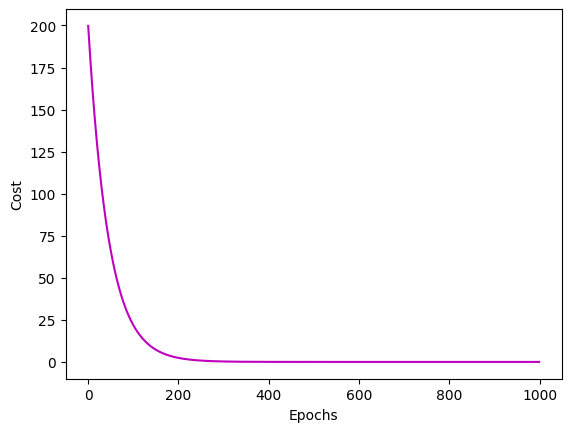

In [116]:
plt.plot(np.arange(0, EPOCHS), cost, 'm')
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.show()

# <font color='red'>Draw the prediction line</font>

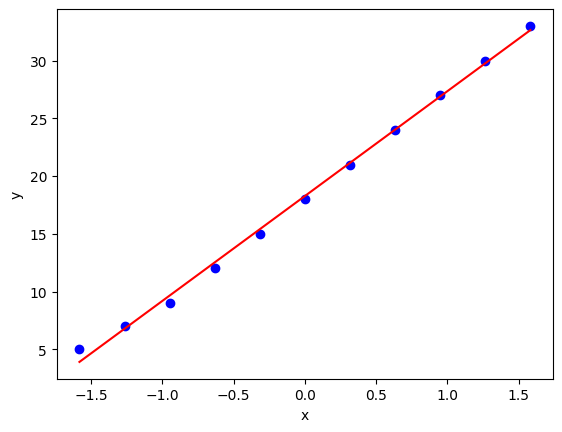

Predicted line:  18.27244013188535  +  9.084234239230534  * x


In [117]:
 # replot the data
plt.plot(x[:, 1], y, 'bo')

# plot the prediction linear funtions
x_values = np.linspace(np.min(x[:, 1]), np.max(x[:, 1]), 100)
y_values = linear_function(x_values, w)
plt.plot(x_values, y_values, 'r')

plt.xlabel("x")
plt.ylabel("y")
plt.show()

print("Predicted line: ", w[0][0], " + ", w[1][0], " * x")